In [149]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [ ]:
#padding in logscale: frequency | amplitude
#dlogf is the spacing of exponent of 10 for frequency 
#range: np.log10(dlogf) to 0-dlogf
#filler in frequency : 10**np.linspace(lower,higher,(higher-lower)/dlogf)

In [12]:
#noise
data=np.loadtxt('curves.txt')
freq=data[:,0]
dataLigo=data[:,1]
frequency=np.zeros(4096)
amplitude=np.zeros(4096)
#crass redifinition of frequency bins
frequency[0:2048]=np.linspace(0,10000,2048)
amplitude[0:2048]=dataLigo[0:2048]

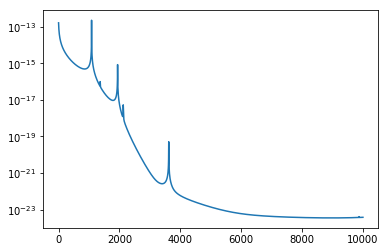

In [157]:
plt.plot(frequency[0:2048],amplitude[0:2048])
plt.yscale('log')

In [16]:
frequency[2048:]=np.flip(frequency[0:2048],0)
amplitude[2048:]=np.flip(amplitude[0:2048],0)

In [44]:
phase=np.random.uniform(0,2*np.pi,4096)
ifft=np.fft.ifft(amplitude*np.exp(1j*phase))

In [45]:
df=frequency[1]-frequency[0]
time=np.linspace(0,df,4096)

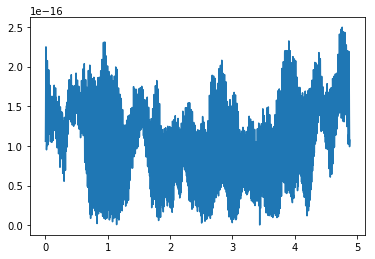

In [46]:
plt.plot(time,abs(ifft))
#plt.plot(time,signal,'r')

In [204]:
A=1.2*10**(-14)
f=40
signal=A*np.sin(2*np.pi*f*time)

In [48]:
data=h5py.File('H-H1_LOSC_4_V1-931127296-4096.hdf5')

In [80]:
data.keys()

[u'meta', u'quality', u'strain']

In [81]:
data['meta'].keys()

[u'Description',
 u'DescriptionURL',
 u'Detector',
 u'Duration',
 u'GPSstart',
 u'Observatory',
 u'Type',
 u'UTCstart']

In [83]:
data['meta']['Duration'].value

4096

In [207]:
noise=data['strain']['Strain'].value #THIS IS NOT NOISE RATHER STRAIN DATA

In [141]:
len(noise)

16777216

In [205]:
time=np.linspace(0,4096,16777216)

In [92]:
data['quality'].keys()

[u'detail', u'injections', u'simple']

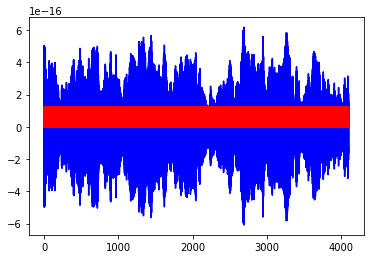

In [154]:
plt.plot(time,noise,'b',time,signal,'r')

In [208]:
signal_data=noise+signal

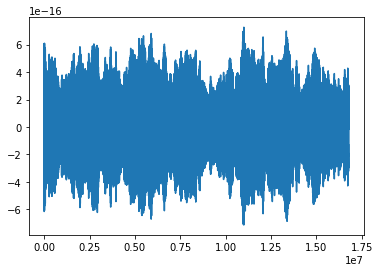

In [160]:
plt.plot(signal_data)

In [209]:
minute_data=np.zeros(69)
minute_signal=np.zeros(69)

In [210]:
for n in range(69):
    minute_data[n]=1.0/240000*(sum(signal_data[n*240000:240000*(n+1)]))

In [211]:
for n in range(69):
    minute_signal[n]=1.0/240000*(sum(signal[n*240000:240000*(n+1)]))

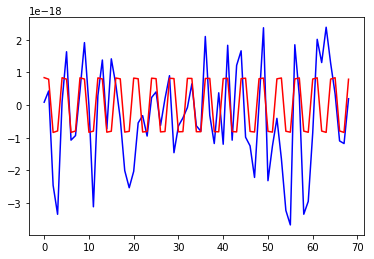

In [212]:
plt.plot(minute_data,'b',minute_signal,'r')

In [203]:
minute_signal

array([ 8.38902540e-21,  7.90375254e-21, -8.37515035e-21, -7.91845513e-21,
        8.36124949e-21,  7.93313331e-21, -8.34732286e-21, -7.94778705e-21,
        8.33337051e-21,  7.96241630e-21, -8.31939247e-21, -7.97702100e-21,
        8.30538880e-21,  7.99160113e-21, -8.29135953e-21, -8.00615662e-21,
        8.27730471e-21,  8.02068744e-21, -8.26322438e-21, -8.03519355e-21,
        8.24911859e-21,  8.04967489e-21, -8.23498737e-21, -8.06413142e-21,
        8.22083077e-21,  8.07856310e-21, -8.20664884e-21, -8.09296989e-21,
        8.19244162e-21,  8.10735173e-21, -8.17820915e-21, -8.12170859e-21,
        8.16395148e-21,  8.13604042e-21, -8.14966865e-21, -8.15034717e-21,
        8.13536070e-21,  8.16462881e-21, -8.12102768e-21, -8.17888529e-21,
        8.10666964e-21,  8.19311656e-21, -8.09228661e-21, -8.20732258e-21,
        8.07787864e-21,  8.22150331e-21, -8.06344578e-21, -8.23565870e-21,
        8.04898807e-21,  8.24978871e-21, -8.03450555e-21, -8.26389330e-21,
        8.01999827e-21,  